# Problem Statement:

This project will research and analyze data about coronavirus (COVID-19) in Vietnam and around the world.

Data is collected from the website: https://data.opendevelopmentmekong.net/dataset/coronavirus-covid-19-cases-in-vietnam/resource/d2967df9-3ef2-4d86-ad21-c14becf043fc

### Goal:
We need a strong model that predicts how the viruss could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the viruss in the next 7 day

### Tasks to be performed:
- Analysing the present condition in Vietnam
- Is this trend similar to Italy/S.Korea/Wuhan
- Exploring the world wide data
- Forecasting the world wide data
- Forecasting the world wide COVID-19 cases using Prophets

In [2]:
# import libraries:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize'] = 10,12

import warnings
warnings.filterwarnings('ignore')

## Part 1: Analysing the present condition in Vietnam
1. Reading the Datasets
2. Analysing COVID-19 Cases in VietNam
3. Number of Active COVID-19 cases in Provinces
4. Visualising the spread geographically
5. Cofirmed vs Recovered figures
6. How the Coronaviruss cases are rising?

#### 1.1 Reading the Datasets

In [3]:
df = pd.read_csv('data_vn/covid19-provinces_vn.csv')
df_vietnam = df.copy()

df.head()

,HASC,ISO,FIPS,Administration Code,Province,Total Confirmed Cases (Viet Nam National),Total Confirmed Cases (Foreign National),Recovered,Deaths
0,VN.HI,HN,VM44,1,Ha Noi,945,10,518,20
1,VN.HG,3,VM50,2,Ha Giang,4,4,3,0
2,VN.CB,4,VM05,4,Cao Bang,0,3,0,0
3,VN.BK,53,VM72,6,Bac Kan,6,0,0,0
4,VN.TQ,7,VM68,8,Tuyen Quang,1,0,1,0


In [4]:
df.shape

(63, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   HASC                                       63 non-null     object
 1   ISO                                        63 non-null     object
 2   FIPS                                       63 non-null     object
 3   Administration Code                        63 non-null     int64 
 4   Province                                   63 non-null     object
 5   Total Confirmed Cases (Viet Nam National)  63 non-null     int64 
 6   Total Confirmed Cases (Foreign National)   63 non-null     int64 
 7   Recovered                                  63 non-null     int64 
 8   Deaths                                     63 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 4.6+ KB


In [5]:
#Remove column
df.drop(['HASC', 'ISO', 'FIPS', 'Administration Code'], axis = 1, inplace = True)

In [6]:
df.head()

,Province,Total Confirmed Cases (Viet Nam National),Total Confirmed Cases (Foreign National),Recovered,Deaths
0,Ha Noi,945,10,518,20
1,Ha Giang,4,4,3,0
2,Cao Bang,0,3,0,0
3,Bac Kan,6,0,0,0
4,Tuyen Quang,1,0,1,0


In [7]:
#Coordinate of India States and Union Territories
Vietnam_coord = pd.read_csv('data_vn/Vietnam_province_info.csv')

#Day by day of Vietnam, Korea, Italy, and Wuhan
dbd_Vietnam = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='Vietnam')
dbd_India = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='India')
dbd_Korea = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='Korea')
dbd_China = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='China')

#### 1.2 Analysing COVID 19 Cases in Vietnam

In [8]:
# Create a new attribute of 'Total case'
#Total case is the total number of confirmed cases (Vietnam National + Foreign Nation)

df['Total cases'] = df['Total Confirmed Cases (Viet Nam National)'] + df['Total Confirmed Cases (Foreign National)']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 19 cases across Vietnam till date (August 9, 2021):', total_cases )

Total number of confirmed COVID 19 cases across Vietnam till date (August 9, 2021): 57734


In [9]:
#Highlight dataframe
df.style.background_gradient()  

,HASC,ISO,FIPS,Administration Code,Province,Total Confirmed Cases (Viet Nam National),Total Confirmed Cases (Foreign National),Recovered,Deaths,Total cases
0,VN.HI,HN,VM44,1,Ha Noi,945,10,518,20,955
1,VN.HG,3,VM50,2,Ha Giang,4,4,3,0,8
2,VN.CB,4,VM05,4,Cao Bang,0,3,0,0,3
3,VN.BK,53,VM72,6,Bac Kan,6,0,0,0,6
4,VN.TQ,7,VM68,8,Tuyen Quang,1,0,1,0,1
5,VN.LO,2,VM90,10,Lao Cai,9,0,2,0,9
6,VN.DB,71,VM92,11,Dien Bien,59,2,52,0,61
7,VN.LI,1,VM89,12,Lai Chau,1,2,1,0,3
8,VN.SL,5,VM32,14,Son La,1,1,0,0,2
9,VN.YB,6,VM70,15,Yen Bai,5,0,5,0,5


##### Visualization
- Kerela has Maharashtra in terms of highest number of comfirmed cases.
- Haryana and Telangana has the highest count of confirmed Foreign National count
- Till 25th of March 9 people have died in India
- Kerala, Maharashtra, and Karnataka are currently TOP 3 states with maximum number of confirmed cases

#### 1.3 Number of Active COVID-19 cases in affected State/Union Territories

In [10]:
#Total Active is the total cases - (Number of death + cured)
df['Total Active'] = df['Total cases'] - (df['Deaths'] + df['Recovered'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across Vietnam: ', total_active)
Tot_Cases = df.groupby('Province')['Total Active'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient()  

Total number of active COVID 2019 cases across Vietnam:  48835


,Total Active
Province,
Ho Chi Minh,33608
Binh Duong,3029
Bac Giang,2347
Dong Thap,1284
Dong Nai,971
Tien Giang,890
Long An,725
Phu Yen,704
Bac Ninh,676


#### 1.4 Visualising the spread geographically

In [11]:
#Learn how to use folium to create a zoomable map
# Tạo bản đồ
map = folium.Map(location=[14.0583, 108.2772], zoom_start=5)

# Hợp nhất dữ liệu từ hai dataframe dựa trên cột 'Province'
df_full = pd.merge(Vietnam_coord, df, on='Province')

# Thêm các CircleMarker vào bản đồ
for lat, lon, value, name in zip(df_full['Lat'], df_full['Long'], df_full['Total cases'], df_full['Province']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=value * 0.01,
        color='red',
        fill_color='red',
        fill_opacity=0.3,
        popup = ('<strong>State</strong>: '+ str(name).capitalize() +  '<br><strong>Total Cases</strong>: ' + str(value) )
    ).add_to(map)

map

#### 1.5 Confirmed vs Recovered figures

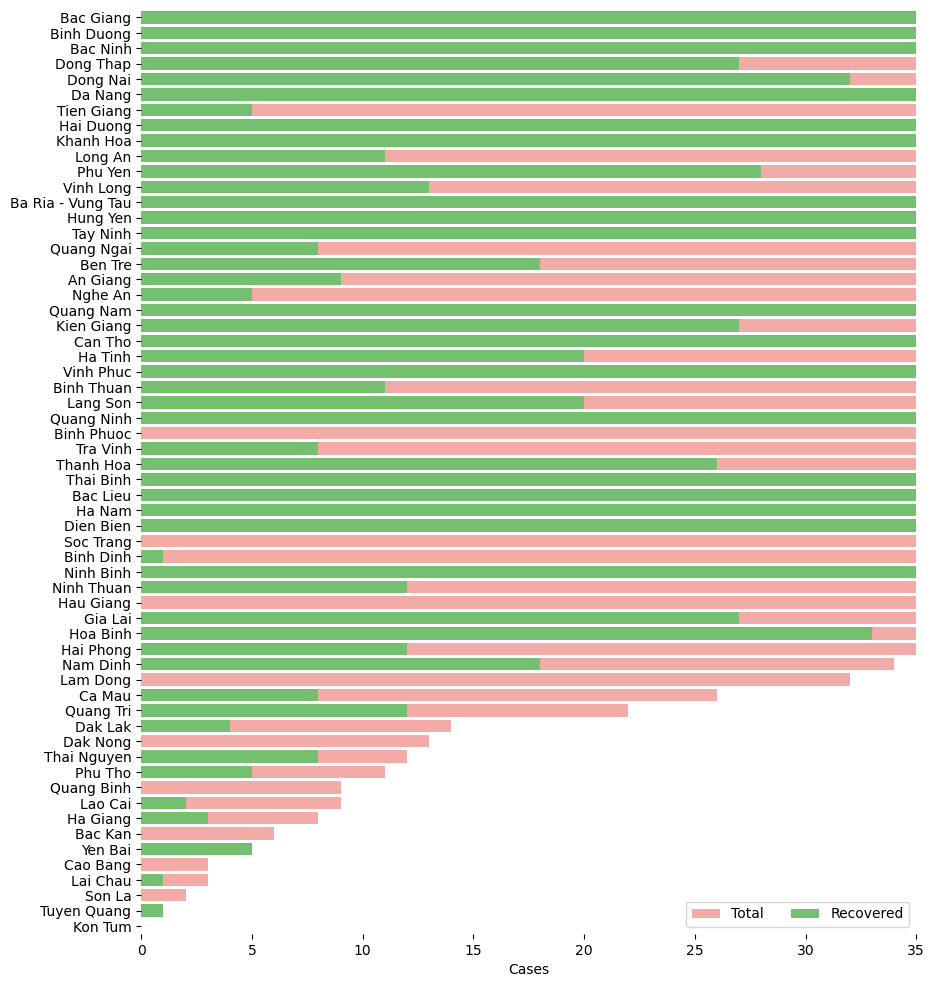

In [12]:
f, ax = plt.subplots(figure = (12, 8))
data = df_full[['Province', 'Total cases', 'Recovered', 'Deaths']]
data.sort_values('Total cases', ascending = False, inplace = True)

sns.set_color_codes("pastel")
sns.barplot(x ="Total cases", y="Province", data = data, label = "Total", color = "r")

sns.set_color_codes("muted")
sns.barplot(x = "Recovered", y="Province", data = data, label = "Recovered", color="g")

#Add a legend and informative axis label
ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(xlim = (0,35), ylabel = "", xlabel = "Cases")
sns.despine(left = True, bottom = True)

#### 1.6 How the Coronavirus cases are rising?

In [13]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [14]:
#Rise of COVID-19 cases in Vietnam
fig = go.Figure()
fig.add_trace(go.Scatter(x = dbd_Vietnam['Date'], y = dbd_Vietnam['Total Cases'], mode = 'lines + markers', name = 'Total Cases'))
fig.update_layout(title_text = 'Trend of Coronavirus Cases in Vietnam (Cumulative cases)', plot_bgcolor = 'rgb(230,230,230)')
fig.show()

#New COVID-19 cases reported daily in Vietnam
import plotly.express as px
fig = px.bar(dbd_Vietnam, x="Date", y="New Cases", barmode = 'group', height = 400)
fig.update_layout(title_text = 'Coronavirus Cases in Vietnam on daily basis', plot_bgcolor='rgb(230,230,230)')
fig.show()

## Part 2: Is the trend similar to Italy/S.Korea/Wuhan?
1. Cumulative cases in India, S.Korea, and Wuhan
2. Comparasion between the rise of cases in Wuhan, S.Korea, Italy and India
3. Trend after crossing 100 cases
4. Why is India testing so little?

India has already crossed 562 cases. It is very important to contain the situation in the coming 21 days. The numbers of coronavirus patients starting doubling after these countries hit the 100 mark and almost starting increasing exponentially.

#### 2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan

In [15]:
# Vietnam
fig = px.bar(dbd_Vietnam, x="Date", y="Total Cases", color='Total Cases', orientation = 'v', height = 600,
            title = 'Confirmed Cases in Vietnam', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

# India
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation = 'v', height = 600,
            title = 'Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()


# Korea
fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation = 'v', height = 600,
            title = 'Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

# China
fig = px.bar(dbd_China, x="Date", y="Total Cases", color='Total Cases', orientation = 'v', height = 600,
            title = 'Confirmed Cases in China', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

##### Visualization Inference
- Confirmed cases in India is rising exponentially with no fixed  pattern (Very less test in India)
- Confirmed cases in Italy is rising exponentially with certain fixed pattern
- Confirmed cases in S.Korea is rising gradually
- There has been only 3 confirmed cases in Wuhan since last week. They have almost controlled the COVID-19

#### 2.2 Comparision between the rise of cases in Wuhan, S.Korea, Italy and India

In [20]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows = 2, cols = 2,
    specs = [[{}, {}],
    [{"colspan": 2}, None]],
    subplot_titles = ("S.Korea", "Vietnam", "India", "China")
)

fig.add_trace(go.Bar(x = dbd_Vietnam['Date'], y=dbd_Vietnam['Total Cases'],
                    marker = dict(color = dbd_Vietnam['Total Cases'], coloraxis = "coloraxis")), 1,1)


fig.add_trace(go.Bar(x = dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker = dict(color = dbd_Korea['Total Cases'], coloraxis = "coloraxis")), 1,2)


fig.add_trace(go.Bar(x = dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker = dict(color = dbd_India['Total Cases'], coloraxis = "coloraxis")), 2,1)

# fig.add_trace(go.Bar(x = dbd_China['Date'], y=dbd_China['Total Cases'],
#                     marker = dict(color = dbd_China['Total Cases'], coloraxis = "coloraxis")), 2,1)

fig.update_layout(coloraxis = dict(colorscale = 'Bluered_r'), showlegend = False, title_text = "Total Confirmed cases(Cumulative)")
fig.update_layout(plot_bgcolor = 'rgb(230,230,230)')
fig.show()

#### 2.3 Trend after crossing 100 cases

In [21]:
title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10,10,12]
line_size = [1,1,8]

fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'],
                        y = dbd_Korea['Total Cases'], mode = 'lines',
                        name = labels[0],
                        line = dict(color = colors[0], width = line_size[0]),
                        connectgaps = True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'],
                        y = dbd_India['Total Cases'], mode = 'lines',
                        name = labels[2],
                        line = dict(color = colors[2], width = line_size[2]),
                        connectgaps = True))

fig.add_trace(go.Scatter(x=dbd_Vietnam['Days after surpassing 100 cases'],
                        y = dbd_Vietnam['Total Cases'], mode = 'lines',
                        name = labels[1],
                        line = dict(color = colors[1], width = line_size[1]),
                        connectgaps = True))
annotations = []

annotations.append(dict(xref = 'paper', yref = 'paper', x=0.5, y=0.1,
                       xanchor = 'center', yanchor = 'top',
                       text = 'Days after crossing 100 cases',
                       font = dict(family = 'Arial',
                                  size = 12,
                                  color = 'rgb(150,150,150)'),
                       showarrow = False))

fig.update_layout(annotations = annotations, plot_bgcolor = 'white', yaxis_title = 'Cumulative cases')

fig.show()

KeyError: 'Days after surpassing 100 cases'

## Part 3: Exploring World wide data
1. Visualizing: Worldwide COVID-19 cases


In [22]:
df = pd.read_csv('data_world/covid_19_clean_complete.csv', parse_dates = ['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace = True)

df_confirmed = pd.read_csv("data_world/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("data_world/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("data_world/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace= True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace= True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace= True)

In [23]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [24]:
df.drop(['WHO Region'], axis=1, inplace=True)
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0


In [25]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country         49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


Province/State    34404
Country               0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
dtype: int64

In [26]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']]
df2.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
8,2020-01-22,Australian Capital Territory,Australia,0,0,0
9,2020-01-22,New South Wales,Australia,0,0,0
10,2020-01-22,Northern Territory,Australia,0,0,0
11,2020-01-22,Queensland,Australia,0,0,0
12,2020-01-22,South Australia,Australia,0,0,0
...,...,...,...,...,...,...
49052,2020-07-27,Anguilla,United Kingdom,3,0,3
49053,2020-07-27,British Virgin Islands,United Kingdom,8,1,7
49054,2020-07-27,Turks and Caicos Islands,United Kingdom,99,2,36
49059,2020-07-27,Falkland Islands (Malvinas),United Kingdom,13,0,13


In [27]:
#Check for India's data
df.query('Country == "India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
183,2020-07-23,1288108,30601,817209
184,2020-07-24,1337024,31358,849432
185,2020-07-25,1385635,32060,885573
186,2020-07-26,1435616,32771,917568


In [28]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases
df.groupby('Date').sum().head().drop(['Province/State','Country'], axis=1)

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


#### 3.1 Visualizing: Worldwide NCOVID-19 cases

In [29]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode = 'lines+markers', name = 'Confirmed', line = dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode = 'lines+markers', name = 'Deaths', line = dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode = 'lines+markers', name = 'Recovered', line = dict(color='green', width=2)))

fig.update_layout(title = 'Worldwide NCOVID-19 Cases', xaxis_tickfont_size = 14, yaxis = dict(title='Number of Cases'))
fig.show()

## Part 4: Forecasting Total Number of Cases Worldwide
- Prophet
- Why Prophet?

1. Forecasting Cofirmed COVID-19 Cases Worldwide with Prophet
2. Forecasting Deaths Cases Worldwide with Prophet
3. Forecasting Recovered Cases Worldwide with Prophet
4. Inference from the above Analysis and Forecast

#### Prophet

Prophet is open source software released by Facebook's Core Data Science team. It is available for download on CRAN and PyPI.
We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

#### Why Prophet?

- Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.
- Fully automatic: Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series
- Tunable forecasts: The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human- interpretable parameters to improve your forecast by adding your domai knowledge.
- Available in R or Python: Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you're comfortable with to get forecasts.

In [31]:
import prophet
print(prophet.__file__)

D:\Programs\anaconda3\Lib\site-packages\prophet\__init__.py


In [32]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: ds and y. The ds(datestamp) columns should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast

In [33]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [34]:
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


#### 4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors

In [35]:
from prophet import Prophet

In [36]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods = 7)
future.tail()

15:49:52 - cmdstanpy - INFO - Chain [1] start processing
15:49:52 - cmdstanpy - INFO - Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as column for components and uncertainty intervals

In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674820e+07,1.658788e+07,1.689498e+07
191,2020-07-31,1.696362e+07,1.680259e+07,1.712519e+07
192,2020-08-01,1.717143e+07,1.699812e+07,1.733842e+07
193,2020-08-02,1.736922e+07,1.718191e+07,1.753094e+07
194,2020-08-03,1.756410e+07,1.736674e+07,1.774766e+07


You can plot the forecast by calling the Prophet.plot.method and passing in your forecast dataframe

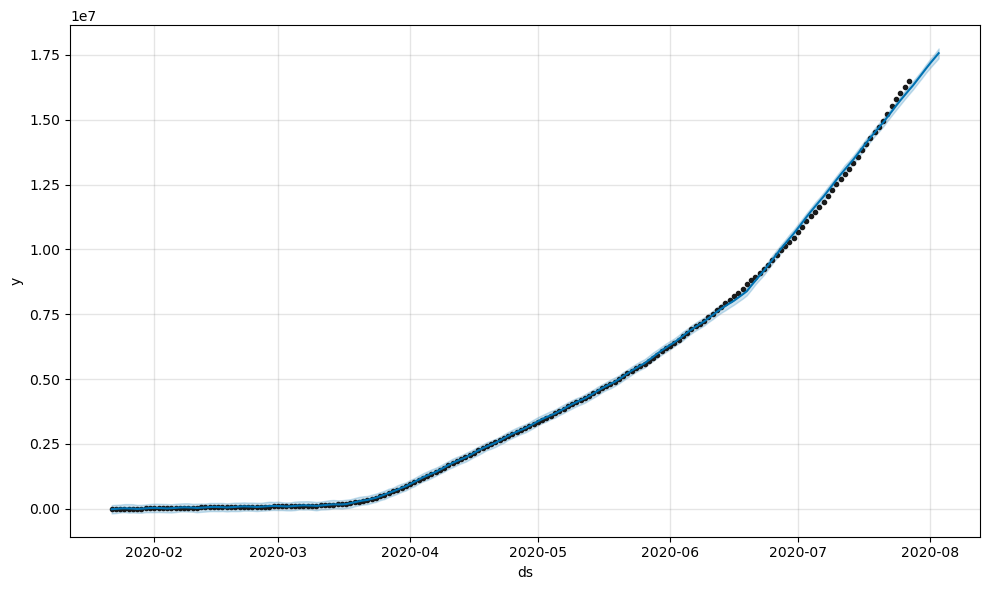

In [38]:
confirmed_forecast_plot = m.plot(forecast)

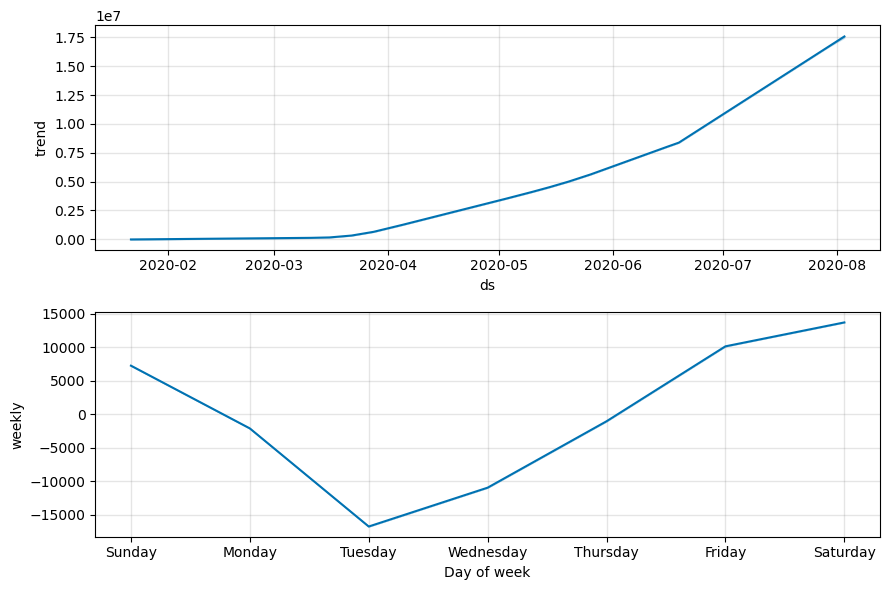

In [39]:
confirmed_forecast_plot = m.plot_components(forecast)

#### 4.2 Forecasting Worldwide deaths using Prophet (Base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors

In [40]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [41]:
m = Prophet(interval_width = 0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods = 7)
future.tail()

15:49:56 - cmdstanpy - INFO - Chain [1] start processing
15:49:56 - cmdstanpy - INFO - Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663521.743356,660383.162199,666505.484489
191,2020-07-31,669038.962960,665448.049369,672494.752776
192,2020-08-01,673922.465056,670074.055519,678243.996106
193,2020-08-02,678060.469456,673630.188085,682873.624059
194,2020-08-03,682351.854619,677165.289450,687722.938964


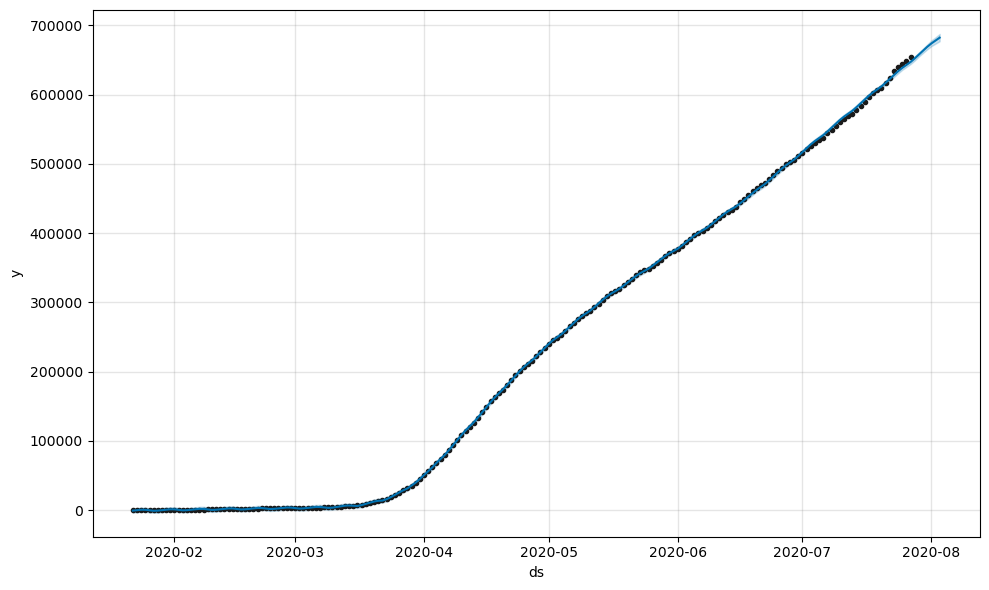

In [43]:
deaths_forecast_plot = m.plot(forecast)

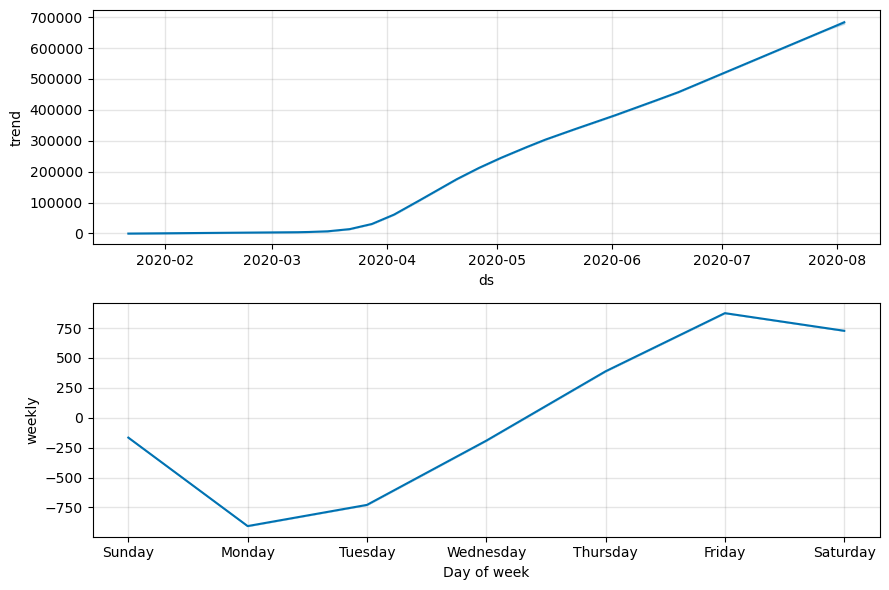

In [44]:
deaths_forecast_plot = m.plot_components(forecast)

#### 4.3 Frecasting Worldwide Recovered Cases with Prophet (Base model)

In [45]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [46]:
m = Prophet(interval_width = 0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods = 7)
future.tail()

15:49:58 - cmdstanpy - INFO - Chain [1] start processing
15:49:58 - cmdstanpy - INFO - Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,9.598531e+06,9.477285e+06,9.724021e+06
191,2020-07-31,9.740095e+06,9.620822e+06,9.867848e+06
192,2020-08-01,9.880394e+06,9.759370e+06,1.000270e+07
193,2020-08-02,1.000646e+07,9.876162e+06,1.013649e+07
194,2020-08-03,1.014305e+07,1.001195e+07,1.026886e+07


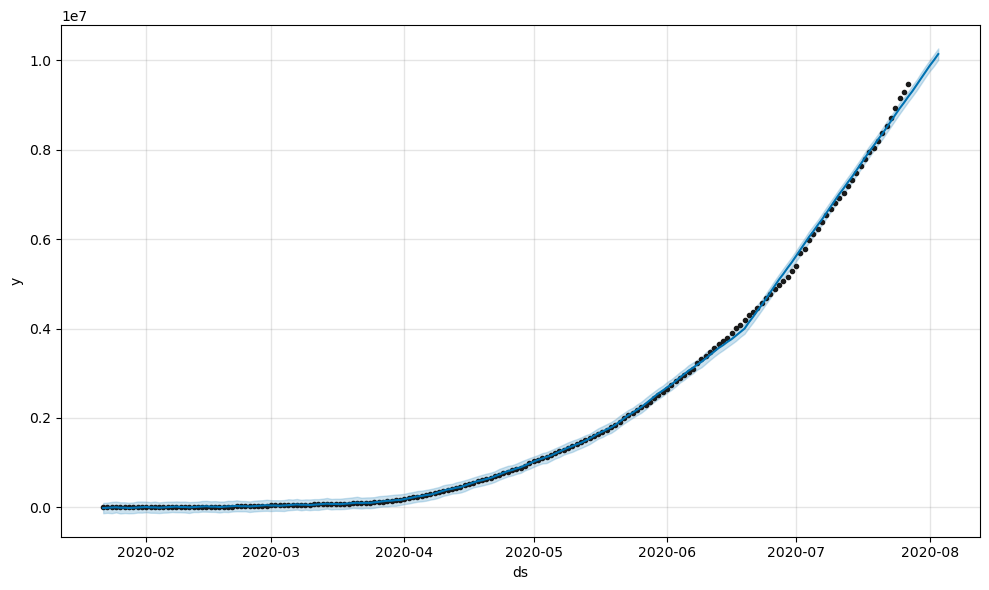

In [48]:
recovered_forecast_plot = m.plot(forecast)

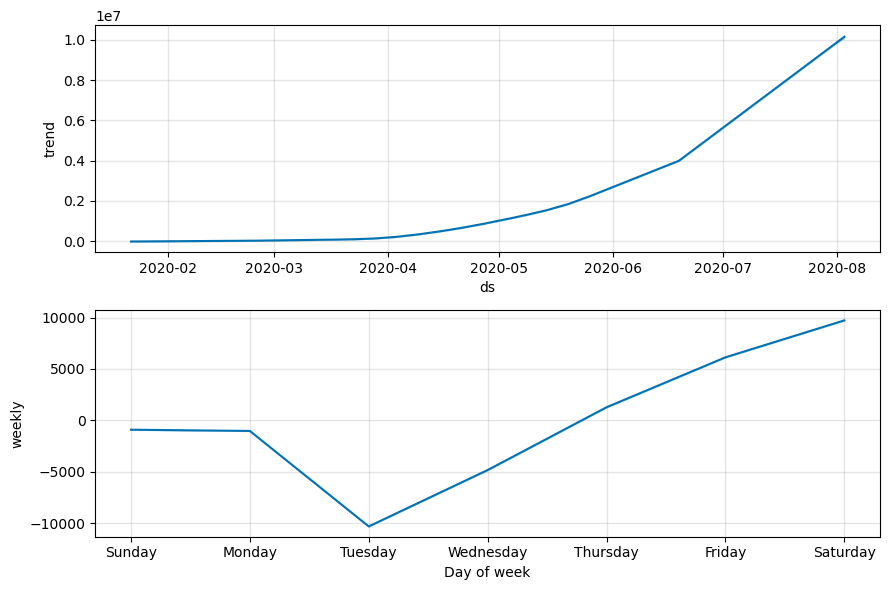

In [49]:
recovered_forecast_plot = m.plot_components(forecast)

#### 4.4 Inference from the above Analysis and Forecast